In [10]:
from perplexity import Perplexity
import os
from dotenv import load_dotenv
from pydantic import BaseModel

class format(BaseModel):
    reasoning: str
    in_short: str
load_dotenv()
client = Perplexity()

def invoke(query,format=None):
    response = client.responses.create(
        model="google/gemini-2.5-pro",
        input=query,response_format=format
    )
    return response



In [24]:
from perplexity import Perplexity

class StructuredPerplexity:
    def __init__(self, client, model):
        self.client = client
        self.model = model

    def invoke(self, query: str, schema_model: BaseModel):
        schema = schema_model.model_json_schema()

        prompt = f"""
You are a JSON API.

Rules:
- Output ONLY valid JSON
- No markdown
- No backticks
- No explanation
- No extra keys
- No missing keys
- Values must match types EXACTLY

Schema:
{schema}

User query:
{query}

JSON:
"""

        resp = self.client.responses.create(
            model=self.model,
            input=prompt
        )

        return schema_model.model_validate_json(resp.output_text)


In [25]:
from pydantic import BaseModel
from typing import List

class Answer(BaseModel):
    short_answer: str
    confidence: float
    sources: List[str]


client = Perplexity()
llm = StructuredPerplexity(client, "google/gemini-2.5-flash")

result = llm.invoke(
    "What is the capital of India?",
    Answer
)

print(result.short_answer)


New Delhi


In [27]:
print(result.confidence)

1.0


In [11]:
result = invoke("how are you?",format=format)

TypeError: Object of type ModelMetaclass is not JSON serializable

In [21]:
llm.invoke("hi how are you")

AIMessage(content='"Hi, how are you?" is a common informal English greeting that combines a casual hello with a question about someone\'s well-being.[1][2]\n\n**"Hi"** is one of the most popular greetings for informal situations, typically followed by the person\'s name.[1] It\'s appropriate to use with friends, coworkers, and acquaintances.\n\n**"How are you?"** is a standard follow-up question that opens the conversation.[2] Common responses include:\n\n- "I\'m good, thanks."[2]\n- "Fine, thanks."[2]\n- "I\'m doing okay."[2]\n- "Pretty good. And you?"[2]\n- "Not too bad."[2]\n\nIn U.S. English specifically, it\'s quite common to skip saying "hello" entirely and start directly with a question about how the other person is doing, which makes the conversation get going more quickly.[3]', additional_kwargs={'citations': ['https://preply.com/en/blog/22-useful-english-greetings-for-every-day/', 'https://www.englishalex.com/post/life-beyond-how-are-you-the-most-common-english-greetings-and-

In [10]:
from langchain_groq import ChatGroq
from dotenv import load_dotenv
load_dotenv()
# Choose the best model for your task
model_name = "qwen/qwen3-32b"  # example

llm = ChatGroq(
    model=model_name,
    temperature=0.2,   # adjust as needed
)

response = llm.invoke([{"role": "user", "content": "Explain quantum computing simply."}])
print(response.content)


<think>
Okay, so I need to explain quantum computing in a simple way. Let me start by recalling what I know. Quantum computing uses quantum bits, or qubits, right? Unlike classical bits that are either 0 or 1, qubits can be both at the same time. That's called superposition. But how does that work exactly? Maybe I should compare it to something familiar.

Wait, maybe using the analogy of a light switch. A regular switch is either on or off, but a qubit is like a dimmer switch that can be in between. But that might not capture the full picture. Superposition allows qubits to exist in multiple states simultaneously, which could process a lot of information at once. But how does that translate to computation?

Then there's entanglement. I remember that when qubits are entangled, their states are linked. So changing one affects the other instantly, no matter the distance. That's a key part of quantum computing, but how does that help in solving problems faster?

Also, quantum computers use

In [ ]:
from pydantic import BaseModel,Field

class format(BaseModel):
    thinking: str = Field(...,description="If you are thinking then your thinking should be here.")
    text: str = Field(...,description="The final answer.")


In [14]:
result = llm.invoke("what is the capital of india in 1 word.Reason carefully before answering, but do not include your reasoning in the output.")

In [15]:
result

AIMessage(content='<think>\nOkay, so the user is asking for the capital of India in one word. Let me think. I know that India is a country in South Asia. The capital isn\'t Mumbai or Delhi? Wait, Delhi is often mentioned. But there\'s also New Delhi. Wait, what\'s the difference between Delhi and New Delhi? I think New Delhi is the actual capital city, which is a part of the National Capital Territory of Delhi. So the correct answer should be New Delhi. But sometimes people refer to Delhi as the capital. Hmm. I need to be precise here. Let me confirm. The official capital of India is New Delhi, which is a city within the Delhi region. So the answer should be New Delhi. But the user wants it in one word. Wait, "New Delhi" is two words. Oh, maybe they just want Delhi. But I need to be accurate. The official capital is New Delhi. However, sometimes it\'s written as New Delhi, but maybe in some contexts, it\'s considered a single word. Wait, no, it\'s two words. But maybe the user is expec

In [16]:
import re

def strip_thinking(text: str) -> str:
    return re.sub(r"<think>.*?</think>", "", text, flags=re.DOTALL).strip()

In [17]:
strip_thinking(result.content)

'New Delhi'

In [ ]:
from transformers import pipeline

nlp = pipeline(
    "document-question-answering",
    model="impira/layoutlm-document-qa",
)

nlp(
    "https://templates.invoicehome.com/invoice-template-us-neat-750px.png",
    "What is the invoice number?"
)
# {'score': 0.9943977, 'answer': 'us-001', 'start': 15, 'end': 15}

nlp(
    "https://miro.medium.com/max/787/1*iECQRIiOGTmEFLdWkVIH2g.jpeg",
    "What is the purchase amount?"
)
# {'score': 0.9912159, 'answer': '$1,000,000,000', 'start': 97, 'end': 97}

nlp(
    "https://www.accountingcoach.com/wp-content/uploads/2013/10/income-statement-example@2x.png",
    "What are the 2020 net sales?"
)
# {'score': 0.59147286, 'answer': '$ 3,750', 'start': 19, 'end': 20}


In [6]:
from huggingface_hub import InferenceClient
from dotenv import load_dotenv

load_dotenv()

client = InferenceClient()

response = client.chat_completion(
    model="Qwen/Qwen3-32B",
    messages=[
        {"role": "user", "content": "hello how are you doing"}
    ],

)

print(response.choices[0].message.content)


ValueError: You must provide an api_key to work with groq API or log in with `hf auth login`.

In [1]:
from langchain_anthropic import ChatAnthropic
from dotenv import load_dotenv
load_dotenv()
llm = ChatAnthropic(
    model="claude-haiku-4-5-20251001",
    temperature=0.2,
    max_tokens=1024,
)

response = llm.invoke("Explain transformers in simple terms")
print(response.content)


c:\Users\offic\OneDrive\Desktop\Python-Learning\Data Science\LangGraph-V1.0\Summarizer\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Transformers Explained Simply

## The Basic Idea
A transformer is a machine learning model that learns patterns in data by paying attention to different parts of the input. Think of it like reading a sentence—you don't just look at one word; you understand how all the words relate to each other.

## Key Concept: Attention

Imagine you're reading: *"The bank executive sat by the **bank** of the river."*

A transformer figures out that "bank" here means riverbank, not a financial institution, by looking at surrounding words like "river." This is **attention**—focusing on relevant context.

## How It Works (Simplified)

1. **Input** → Text gets broken into pieces (tokens/words)
2. **Embedding** → Each piece becomes a number representation
3. **Attention** → The model asks: "Which parts matter for understanding this piece?"
4. **Processing** → Information flows through layers that refine understanding
5. **Output** → Produces a prediction or response

## Why They're Powerful

- **Paralle

In [78]:
from typing import TypedDict, List, Dict, Any, Annotated,Optional
import operator

def resettable_add(old: List[str], new: Optional[List[str]]):
    if new is None:
        return []
    return old + new    

class State(TypedDict):
    current_week: int
    lessons: Dict[int, List[str]]              # dummy lessons
    current_week_cell_transcripts: List[str]   # items to fan out
    lesson_cells: Annotated[Dict[int, Dict[int, Annotated[List[str],operator.add]]], operator.or_]
    output: Annotated[List[Dict[int,List[str]]],resettable_add]


In [80]:
from typing import Literal
from langgraph.types import Send



def route_cell(state: State) -> State:
    print("\n[route_cell]")
    week = state["current_week"]
    items = state["lessons"].get(week, [])
    print(f"Routing week {week} with {len(items)} lessons")
    return {"current_week_cell_transcripts": items}


def fan_out_cell(state: State):
    print("[fan_out_cell]")
    items = state.get("current_week_cell_transcripts")

    if not items:
        print("No items to fan out")
        return []

    sends = []
    for idx, item in enumerate(items):
        print(f"  scheduling lesson {idx+1}: {item}")
        sends.append(
            Send(
                "cell_generation",
                {   "lesson_":item,
                    "lesson_id": idx + 1,
                    "current_week": state["current_week"],
                },
            )
        )
    return sends


def cell_generation(state: State) -> State:
    print(f"[cell_generation] week={state['current_week']} lesson={state['lesson_id']}")
    week = state["current_week"]
    lesson_id = state["lesson_id"]
    print("===============================")
    print(state["lesson_"])
    print("===============================")
    return {"output":[{lesson_id:[f"cell for lesson {state['lesson_']} ",f"CELL {state['lesson_'] } completed"]}]}
    return {
        "lesson_cells": {
            week: {
                lesson_id: [f"cell for lesson {lesson_id}"]
            }
        }
    }


def join_cell_generation(state: State) -> State:
    print("[join_cell_generation]")
    # important: clear the fan-out list
    value = state["output"]
    return {"current_week_cell_transcripts": [],"lesson_cells":{state["current_week"]:value},"output":None}


def advance_cells_week(state: State) -> State:
    next_week = state["current_week"] + 1
    print(f"[advance_cells_week] moving to week {next_week}")
    return {"current_week": next_week}


def should_continue_cells(
    state: State,
) -> Literal["route_cell", "build_and_save_notebook"]:
    if state["current_week"] > len(state["lessons"]):
        print("[should_continue_cells] done")
        return "build_and_save_notebook"
    print("[should_continue_cells] continue")
    return "route_cell"


def build_and_save_notebook(state: State) -> State:
    print("\n[build_and_save_notebook]")
    print("Final lesson_cells:")
    print(state["lesson_cells"])
    return {}


In [81]:
from langgraph.graph import StateGraph, START, END


def build_graph():
    g = StateGraph(State)

    g.add_node("route_cell", route_cell)
    g.add_node("fan_out_cell", fan_out_cell)
    g.add_node("cell_generation", cell_generation)
    g.add_node("join_cell_generation", join_cell_generation)
    g.add_node("advance_cells_week", advance_cells_week)
    g.add_node("build_and_save_notebook", build_and_save_notebook)

    g.add_edge(START, "route_cell")

    g.add_conditional_edges(
        "route_cell",
        fan_out_cell,
        ["cell_generation"],
    )

    g.add_edge("cell_generation", "join_cell_generation")
    g.add_edge("join_cell_generation", "advance_cells_week")

    g.add_conditional_edges(
        "advance_cells_week",
        should_continue_cells,
        ["route_cell", "build_and_save_notebook"],
    )

    g.add_edge("build_and_save_notebook", END)

    return g.compile()


In [82]:

initial_state = {
    "current_week": 1,
    "lessons": {
        1: ["L1", "L2", "L3"],
        2: ["L4", "L5"],
    },
    "lesson_cells": {},
}

graph = build_graph()



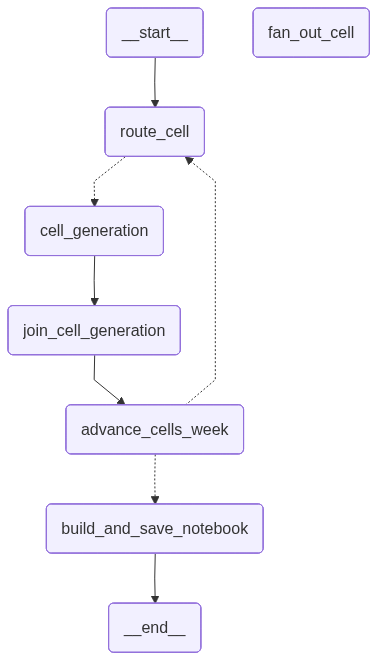

In [83]:
graph

In [84]:
o = graph.invoke(initial_state)


[route_cell]
Routing week 1 with 3 lessons
[fan_out_cell]
  scheduling lesson 1: L1
  scheduling lesson 2: L2
  scheduling lesson 3: L3
[cell_generation] week=1 lesson=1
L1
[cell_generation] week=1 lesson=2
L2
[cell_generation] week=1 lesson=3
L3
[join_cell_generation]
[advance_cells_week] moving to week 2
[should_continue_cells] continue

[route_cell]
Routing week 2 with 2 lessons
[fan_out_cell]
  scheduling lesson 1: L4
  scheduling lesson 2: L5
[cell_generation] week=2 lesson=1
L4
[cell_generation] week=2 lesson=2
L5
[join_cell_generation]
[advance_cells_week] moving to week 3
[should_continue_cells] done

[build_and_save_notebook]
Final lesson_cells:
{1: [{1: ['cell for lesson L1 ', 'CELL L1 completed']}, {2: ['cell for lesson L2 ', 'CELL L2 completed']}, {3: ['cell for lesson L3 ', 'CELL L3 completed']}], 2: [{1: ['cell for lesson L4 ', 'CELL L4 completed']}, {2: ['cell for lesson L5 ', 'CELL L5 completed']}]}


In [85]:
o["lesson_cells"]

{1: [{1: ['cell for lesson L1 ', 'CELL L1 completed']},
  {2: ['cell for lesson L2 ', 'CELL L2 completed']},
  {3: ['cell for lesson L3 ', 'CELL L3 completed']}],
 2: [{1: ['cell for lesson L4 ', 'CELL L4 completed']},
  {2: ['cell for lesson L5 ', 'CELL L5 completed']}]}